In [54]:
import sys
sys.path.append("..")

In [55]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [56]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_8_31")

['../data/results/DE_8_31\\0.feather', '../data/results/DE_8_31\\1.feather', '../data/results/DE_8_31\\2.feather']
0.30165934562683105


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)


In [66]:
results_QNN

,f_sol,optimal_alpha,mse,mse_normalized,method,loss_name,domain,executor_type,encoding_circuit,num_qubits,...,eta,boundary_handling,optimizer,lr,maxiter,tol,num_shots,loss_history,mse_history,gradient_history
0,"[-0.28894738488241156, -0.697917811676889, -1....","[-0.04861262727953836, 3.931689746066604, -5.2...",0.387914,1.812399,QNN,paper,"[0.0, 0.04736842105263158, 0.09473684210526316...",qiskit_shots_variance,ChebyshevTowerAndHEE,6,...,1,pinned,Adam,0.05,100,0.0001,5000,"[1341.23225, 1387.45563, 1196.62255, 1144.4224...","[723.19753, 1089.8892, 741.72808, 1286.79581, ...","[0.47434, 0.24179, 0.29331, 0.35428, 0.37875, ..."
1,"[-0.47146239351621577, -0.44086560434515387, -...","[-0.18889612786012433, 4.148962579585069, -4.9...",0.314957,-0.41846,QNN,paper,"[0.0, 0.04736842105263158, 0.09473684210526316...",qiskit_shots,ChebyshevTowerAndHEE,6,...,1,pinned,Adam,0.05,100,0.0001,5000,"[1329.28649, 1372.45105, 1183.53848, 1130.1746...","[0.24641, 0.21362, 0.22082, 0.25789, 0.34344, ...","[732.35687, 1030.73993, 757.02729, 1239.07666,..."
2,"[1.1292830949801687, 0.6579087270272543, -0.15...","[-1.0223209235576998, 2.663951905483951, -6.63...",0.005282,0.022201,QNN,paper,"[0.0, 0.04736842105263158, 0.09473684210526316...",pennylane,ChebyshevTowerAndHEE,6,...,1,pinned,Adam,0.05,100,0.0001,None,"[1337.05554, 772.4348, 431.61048, 290.69506, 2...","[0.24552, 0.17834, 0.10244, 0.06276, 0.03862, ...","[2181.2765, 1445.29713, 1208.45735, 983.83189,..."


In [57]:
x_line = np.linspace(0.01, 0.9, 20)
f_odeint = odeint(mapping_of_derivatives_of_loss_functions["paper"], [1], x_line[:])[:,0].flatten()

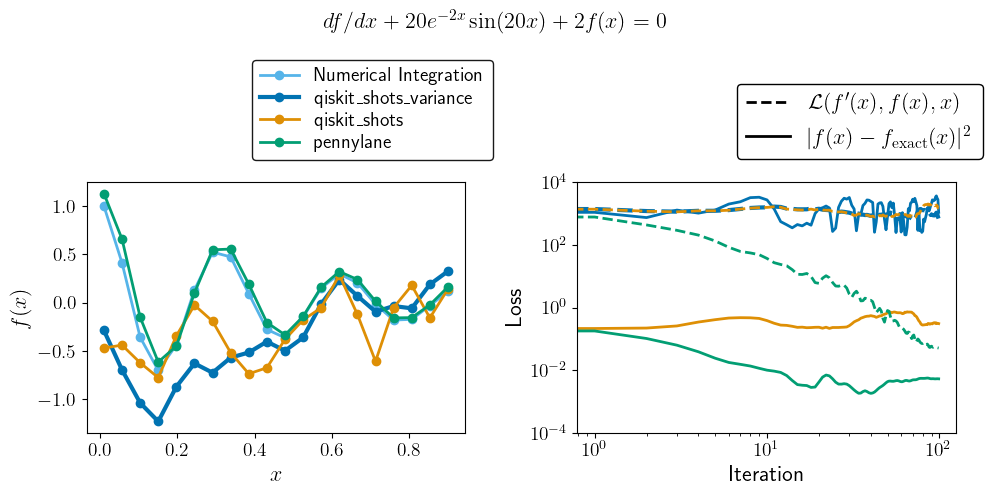

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

#cmap = get_cmap("tab10")  # or another colormap of your choice

cmap = ListedColormap(sns.color_palette("colorblind", 10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

FQK_color, PQK_color, QNN_color = cmap.colors[0], cmap.colors[1], cmap.colors[3]
RBF_color = cmap.colors[7]

x_span_plot = x_line

ax1.plot(x_span_plot, f_odeint, "-o", label="Numerical Integration", color=cmap.colors[9], linewidth=2)
for index in [0, 1, 2]:
    if results_QNN["executor_type"][index] == "qiskit_shots_variance":
        linewidth = 3
    else:
        linewidth = 2   
    ax1.plot(x_span_plot, results_QNN["f_sol"][index], "-o", color=cmap.colors[index], linewidth=linewidth, label=results_QNN["executor_type"][index])

    ax2.plot(results_QNN["loss_history"][index], color=cmap.colors[index], linestyle="--", linewidth=linewidth)
    ax2.plot(results_QNN["mse_history"][index], color=cmap.colors[index], linewidth=2)

ax1.legend()

# dummy plot for legend
ax2.plot([10**-12, 1.2*10**-12 ], color="black", linestyle="--", label="$\mathcal{L}(f^\prime(x), f(x), x)$", linewidth=2)
ax2.plot([10**-12, 1.2*10**-12 ], color="black", label="$|f(x)-f_{\mathrm{exact}}(x)|^2$", linewidth=2)





ax1.legend(fontsize=14, loc="lower right", bbox_to_anchor=(1.1, 1.05), edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
ax2.legend(fontsize=16, loc="lower right", bbox_to_anchor=(1.1, 1.05), edgecolor="black", fancybox=True, frameon=True, framealpha=1, labelspacing=0.5)

plt.suptitle(r"$df/dx + 20 e^{-2 x} \sin(20 x) + 2 f(x) = 0$", fontsize=16)

ax1.set_ylabel("$f(x)$", fontsize=16)
ax1.set_xlabel("$x$", fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.set_ylabel("Loss", fontsize=16)
ax2.set_xlabel("Iteration", fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax2.set_yscale("log")
ax2.set_xscale("log")

ax2.set_ylim(10**-4, 10**4)
plt.tight_layout()
plt.show()

#fig.savefig("../plotting_notebooks/DE_log.png", bbox_inches='tight', dpi=400)
